# 数据可视化



姓名：杨小伟    学号：19340246005          学院：计算机科学技术学院

  【摘要】这次的可视化数据是从世界银行网站下载的世界各国1960年-2020年之间的GDP数值（单位为美元USD）。而这次的project将选取2018年的GDP数据从中挑选10个国家进行绘图。

# 导入环境

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 读取数据 

通过观察可以看到GDP.csv文件中前四行都是无用数据，所以可以在读取数据时跳过。

In [130]:
data = pd.read_csv("GDP.csv",skiprows = [0,1,2,3])
data.head() #打印前5行数据进行检查

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929944e+10,1.970954e+10,2.147872e+10,2.571501e+10,2.351080e+10,2.679160e+10,...,9.498491e+11,9.635604e+11,9.837486e+11,9.186471e+11,8.720235e+11,9.842556e+11,1.011723e+12,1.008375e+12,9.188155e+11,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,7.275714e+11,8.207876e+11,8.514872e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


# 处理数据

In [131]:
data = data.drop(columns=['Indicator Name', 'Indicator Code'], axis=1) #删除无用列
col = ['Country Name','Country Code','2017'] #选择指定列的数据
data = data[col]
data

,Country Name,Country Code,2017
0,Aruba,ABW,3.092430e+09
1,Africa Eastern and Southern,AFE,9.842556e+11
2,Afghanistan,AFG,1.875347e+10
3,Africa Western and Central,AFW,6.837416e+11
4,Angola,AGO,1.221238e+11
...,...,...,...
261,Kosovo,XKX,7.180813e+09
262,"Yemen, Rep.",YEM,2.684013e+10
263,South Africa,ZAF,3.814488e+11
264,Zambia,ZMB,2.587360e+10


In [132]:
Countries = ['CZE','GRC','KAZ','CHL','IRL','IRQ','AGO','QAT','EGY','FIN'] #挑选其中的十个国家
data = data[data['Country Code'].isin(Countries)]
data = data.drop(columns=['Country Code'], axis=1) #删除无用列
data

,Country Name,2017
4,Angola,1.221238e+11
39,Chile,2.770347e+11
54,Czech Republic,2.186289e+11
67,"Egypt, Arab Rep.",2.357337e+11
75,Finland,2.550165e+11
89,Greece,1.993508e+11
111,Ireland,3.346023e+11
113,Iraq,1.872177e+11
120,Kazakhstan,1.668058e+11
200,Qatar,1.610991e+11


In [133]:
top = data.sort_values(by = ['2017'],ascending= False) #根据2017年GDP排序10个国家
top.reset_index(drop=True, inplace = True) #重置index
rank = pd.DataFrame(['1','2','3','4','5','6','7','8','9','10'],columns=['RANK']) #为前15行创建一行rank
top = pd.concat([top, rank], axis=1)
top = top.rename(columns={'Country Name':'Country_Name'}) #重命名列
top = top.rename(columns={'2017':'GDP'}) #重命名列
top

,Country_Name,GDP,RANK
0,Ireland,3.346023e+11,1
1,Chile,2.770347e+11,2
2,Finland,2.550165e+11,3
3,"Egypt, Arab Rep.",2.357337e+11,4
4,Czech Republic,2.186289e+11,5
5,Greece,1.993508e+11,6
6,Iraq,1.872177e+11,7
7,Kazakhstan,1.668058e+11,8
8,Qatar,1.610991e+11,9
9,Angola,1.221238e+11,10


# 绘制图形

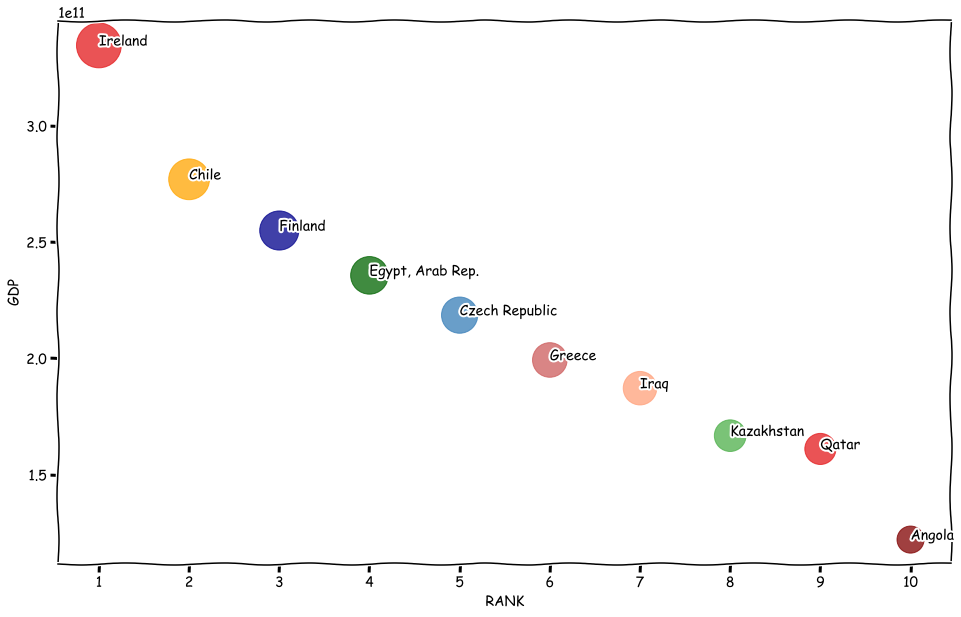

In [144]:
plt.xkcd() #使用xkcd风格绘图
fig = top.plot(x='RANK', y='GDP', kind='scatter', 
                    c=['#e41a1c','#FFA500','#00008B','#006400','#377eb8','#CD5C5C','#FFA07A','#4daf4a','#e41a1c','#800000'], 
                    xticks=range(0,10), s=6*top['GDP']/10**9, alpha=.75, figsize=[16,10])
for i, txt in enumerate(top.Country_Name): #遍历国家名称并将其打印在图像上
    fig.annotate(txt, [top['RANK'][i], top['GDP'][i]], ha='left')